## Student Name : Fergus Mc Hale
## Student ID : 18203485
## Classification

In [609]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [743]:
import sklearn.feature_selection
import pandas as pd
import numpy as np

from sklearn import svm
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.decomposition import FactorAnalysis


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score


from statsmodels.nonparametric.kde import KDEUnivariate
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

from pprint import pprint

In [744]:
TEST_SIZE = 0.3
CSV_SPLIT = ';'

## Training Data

In [745]:
data = pd.read_csv('./data/Absenteeism_at_work.csv',sep=CSV_SPLIT, delimiter=None)

In [746]:
dataset = data.values

In [747]:
X = dataset[:,1:19]
y = dataset[:,20]

In [748]:
print("Covariance matrix:\n", np.cov(X,rowvar=False))
# Create correlation matrix
corr_mat = np.corrcoef(X,rowvar=False)

Covariance matrix:
 [[ 7.11223348e+01 -2.43016494e+00  1.39461654e+00 -1.10573090e+00
  -6.74069780e+01  2.02490217e+01  1.79073255e+00 -4.29499323e+00
  -4.06709115e+01  2.83483890e+00 -1.04011996e+00 -2.68880518e-01
  -5.12891782e-01  2.73598362e-01 -2.53958966e-01 -6.21585049e-01
  -2.92579454e-02 -4.03434151e+00]
 [-2.43016494e+00  1.18080679e+01 -3.18911604e-02  1.55791245e+00
   3.16398713e+01 -1.98186007e-01 -9.47189409e-01 -3.38294993e-02
  -2.28151183e+01 -5.97981202e+00  8.39337308e-02 -1.52982482e-01
   2.98321325e-01  9.57831986e-02 -3.45243755e-02  2.16472223e-01
   1.03053798e+00 -1.42972607e+00]
 [ 1.39461654e+00 -3.18911604e-02  2.02115898e+00  7.34904729e-02
   3.23514611e+00  2.48952383e+00  1.32483634e-01  4.10690122e-02
   8.68798124e-01  1.66486852e-01 -4.86413342e-03  5.60070219e-02
   1.53169001e-01  2.94408075e-02  4.86779066e-03 -5.41345134e-02
  -2.36236331e+00 -7.04686757e-01]
 [-1.10573090e+00  1.55791245e+00  7.34904729e-02  1.23616831e+00
   2.75388216e+00

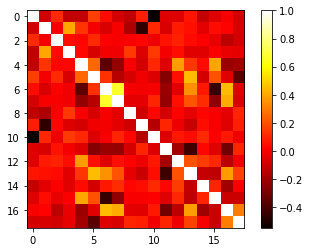

In [749]:
plt.imshow(corr_mat, cmap='hot') #Data before standardization
plt.colorbar() 
plt.show()

In [750]:
standardized_data = data[data.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

In [751]:
standardized_dataset = standardized_data.values

In [752]:
X = standardized_dataset[:,1:19]
y = standardized_dataset[:,20]

In [753]:
del data['ID']

In [754]:
print("Covariance matrix:\n", np.cov(X,rowvar=False))
# Create correlation matrix
corr_mat = np.corrcoef(X,rowvar=False)
print("\nCorrelation matrix:\n", corr_mat)

Covariance matrix:
 [[ 5.11962772e+01 -6.39239130e-01  1.14020833e+00 -3.06458333e-01
  -4.61671377e+01  1.71000815e+01  4.08596014e+00  1.58482790e+00
  -4.24353625e+01  9.54619565e-02  0.00000000e+00 -5.89583333e-01
   4.16847826e-02  4.65081522e-01  0.00000000e+00 -2.72418478e-01
   3.92518116e+00 -3.90317029e+00]
 [-6.39239130e-01  1.23786957e+01 -4.38405797e-03  1.71677536e+00
   3.28392754e+01 -2.26576087e+00 -9.60507246e-01 -1.63297101e-01
  -2.45787561e+01 -5.23554348e+00  0.00000000e+00 -8.70289855e-02
   5.30217391e-01  9.68478261e-02  0.00000000e+00  3.55543478e-01
   3.00724638e-01 -3.39637681e-01]
 [ 1.14020833e+00 -4.38405797e-03  2.04673611e+00  7.34993961e-02
   1.75704106e+00  2.43857790e+00  4.54649758e-02 -1.58680556e-01
   2.15617076e+00  2.28922101e-01  0.00000000e+00  2.66606280e-02
   1.94764493e-01  3.50271739e-02  0.00000000e+00 -6.99365942e-02
  -2.94493961e+00 -1.95549517e-01]
 [-3.06458333e-01  1.71677536e+00  7.34993961e-02  1.22180857e+00
   2.43027778e+00

C:\Users\fergu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\fergu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


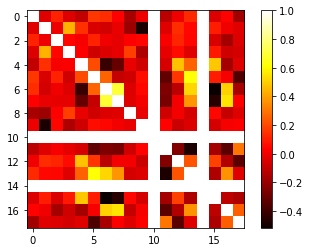

In [755]:
plt.imshow(corr_mat, cmap='hot') #Standardized Correlation matrix with outliners removed
plt.colorbar() 
plt.show()

In [756]:
data.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [757]:
data.isnull().sum().sort_values(ascending=False).head() #check for empty values

Absenteeism time in hours    0
Body mass index              0
Month of absence             0
Day of the week              0
Seasons                      0
dtype: int64

In [758]:
data['Age'].value_counts()

28    117
38    113
37     78
40     58
33     51
36     50
30     46
50     37
41     34
34     29
47     24
43     24
31     22
32     13
58      8
39      8
29      7
27      7
48      6
49      5
46      2
53      1
Name: Age, dtype: int64

In [759]:
data.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average per day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


## Preprocessing

In [760]:
data_scaled = preprocessing.scale(data)
print("\nAFTER:")
print("Mean =", data_scaled.mean(axis=0))
print("Std deviation =", data_scaled.std(axis=0))


AFTER:
Mean = [-1.63232791e-16 -1.34427004e-16  6.72135020e-17  5.76115732e-17
 -9.12183242e-17 -3.00060277e-17 -8.16163953e-17 -4.27285834e-16
 -4.22484870e-16 -2.49650150e-16  1.92038577e-17  1.34427004e-16
 -5.76115732e-17  7.68154309e-17 -5.04101265e-17 -9.60192886e-18
 -1.44028933e-17 -9.04981795e-16  1.12822664e-16  3.00060277e-17]
Std deviation = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


C:\Users\fergu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


## Normalization

In [761]:
# Normalize data use l2 to find outliners
data_normalized_l1 = preprocessing.normalize(data, norm='l1')
data_normalized_l2 = preprocessing.normalize(data, norm='l2')
print("\nL1 normalized data:\n", data_normalized_l1[data_normalized_l1 != 0.])
print("\nL2 normalized data:\n", data_normalized_l2[data_normalized_l2 != 0.])


L1 normalized data:
 [0.0248672  0.00669502 0.00286929 ... 0.08137651 0.18494661 0.02642094]

L2 normalized data:
 [0.05930386 0.01596642 0.00684275 ... 0.19440308 0.44182517 0.06311788]


In [762]:
variable_names = list(data)

## Factor Analysis

In [763]:
# Find the Main Outliners to be used 
factor = FactorAnalysis().fit(data_normalized_l2)
pd.DataFrame(factor.components_ ,columns = variable_names)
transformed_outliner_factors = factor.transform(data_normalized_l2) 
score = factor.score(data_normalized_l2)
print("Score")
print(score)
score_of_each_sample = factor.score_samples(data_normalized_l2)

Score
67.57949188669066


In [764]:
print('Outiners')
outliners = transformed_outliner_factors[transformed_outliner_factors != 0.]
print(outliners)

Outiners
[ 0.4242015  -0.99418546 -0.49961436 ...  0.42383909 -0.47450632
 -0.27414211]


In [765]:
def plot_histogram(x):
    plt.hist(x, color='blue', alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

In [766]:
def find_outliers_kde(x):
    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw="scott", fft=True)
    pred = kde.evaluate(x_scaled)
    
    n = sum(pred < 0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]

    return outlier_ind, outlier_value

In [767]:
# Age
tukey_indices, tukey_values = find_outliers_kde(data['Age'])
print(np.sort(tukey_values))

[53 58 58 58 58 58 58 58 58]


C:\Users\fergu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


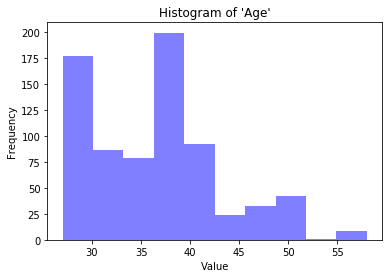

In [768]:
plot_histogram(data['Age'])

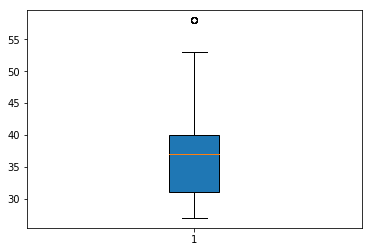

In [769]:
plt.boxplot(data['Age'],patch_artist=True, meanline=True)
plt.show()

In [770]:
# Hit Target
tukey_indices, tukey_values = find_outliers_kde(data['Hit target'])
print(np.sort(tukey_values))

[81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81 81]


C:\Users\fergu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


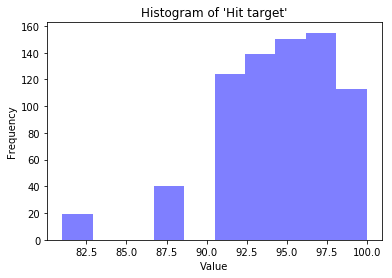

In [771]:
plot_histogram(data['Hit target'])

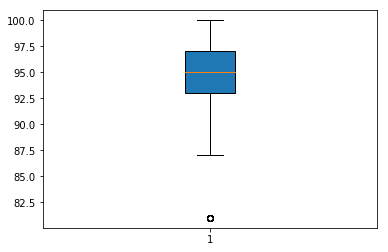

In [772]:
plt.boxplot(data['Hit target'],patch_artist=True, meanline=True)
plt.show()

In [773]:
#Service Time
tukey_indices, tukey_values = find_outliers_kde(data['Service time'])
print(np.sort(tukey_values))

[ 1  1  1  1  1  1  1 24 24 29 29 29 29 29]


C:\Users\fergu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


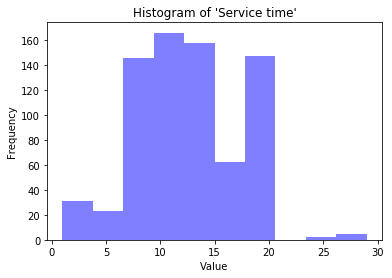

In [774]:
plot_histogram(data['Service time'])

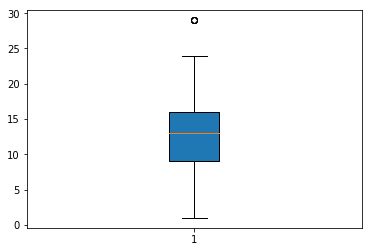

In [775]:
plt.boxplot(data['Service time'],patch_artist=True, meanline=True)
plt.show()

In [776]:
# Absenteeism time in hours
tukey_indices, tukey_values = find_outliers_kde(data['Absenteeism time in hours'])
print(np.sort(tukey_values))

[ 32  32  32  32  32  32  40  40  40  40  40  40  40  48  56  56  64  64
  64  80  80  80 104 112 112 120 120 120]


C:\Users\fergu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


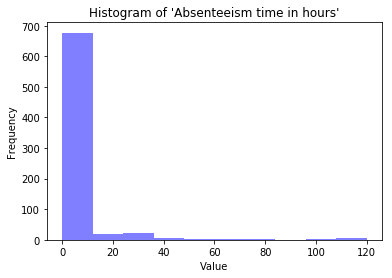

In [777]:
plot_histogram(data['Absenteeism time in hours'])

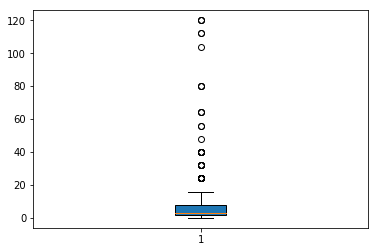

In [778]:
plt.boxplot(data['Absenteeism time in hours'],patch_artist=True, meanline=True)
plt.show()

In [779]:
# Son
tukey_indices, tukey_values = find_outliers_kde(data['Son'])
print(np.sort(tukey_values))

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


C:\Users\fergu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


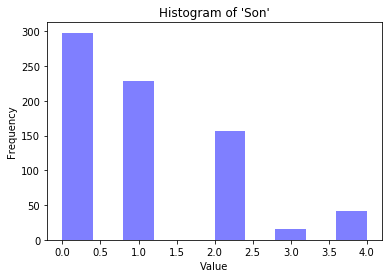

In [780]:
plot_histogram(data['Son'])

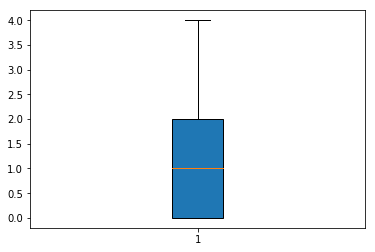

In [781]:
plt.boxplot(data['Son'],patch_artist=True, meanline=True)
plt.show()

In [782]:
# Weight
tukey_indices, tukey_values = find_outliers_kde(data['Weight'])
print(np.sort(tukey_values))

[108 108 108 108 108]


C:\Users\fergu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


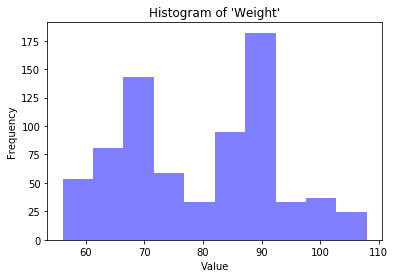

In [783]:
plot_histogram(data['Weight'])

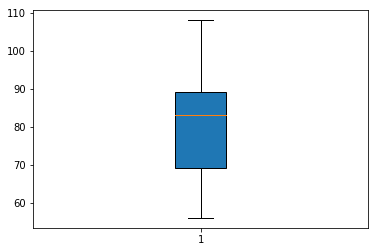

In [784]:
plt.boxplot(data['Weight'],patch_artist=True, meanline=True)
plt.show()

In [785]:
# Height
tukey_indices, tukey_values = find_outliers_kde(data['Height'])
print(np.sort(tukey_values))

[163 163 163 163 163 163 185 185 185 185 185 185 185]


C:\Users\fergu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [786]:
# Body Mass Index
tukey_indices, tukey_values = find_outliers_kde(data['Body mass index'])
print(np.sort(tukey_values))

[34 35 35 36 36 36 36 36 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38 38
 38 38 38]


C:\Users\fergu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


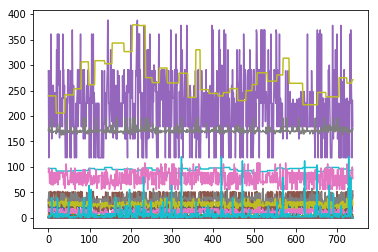

In [787]:
plt.plot(data)
plt.show()

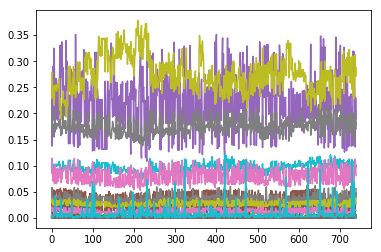

In [788]:
plt.plot(data_normalized_l1)
plt.show()

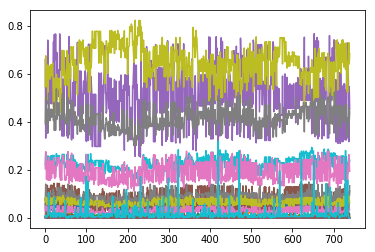

In [789]:
plt.plot(data_normalized_l2)
plt.show()

In [790]:
pprint(outliners.tolist())

[0.4242015007156788,
 -0.9941854562057604,
 -0.4996143581865563,
 -0.020580586745880165,
 0.1186252984356262,
 0.3589405134567208,
 -0.15192498920948366,
 -1.7896157834161917,
 -0.7097230271677479,
 2.245296571107617,
 0.09430765283735242,
 0.550400989738393,
 -0.188187457627043,
 -1.0838520286804436,
 -1.1540677976152007,
 -0.9056619566682999,
 -0.6997756870030264,
 0.0646006877631359,
 -0.06254013404611622,
 -0.0654324272167995,
 -0.24846318103834583,
 0.5530649309277741,
 -0.2916638567411981,
 0.4774109237898416,
 -0.0344413407652574,
 1.5961715502693388,
 -0.0704905091946624,
 0.038826500244104535,
 0.39236078577528277,
 -0.969469077492726,
 -0.5476463225264084,
 -0.17484500493628552,
 0.22266094217370092,
 0.10252102523395691,
 -0.12959932221553458,
 -1.2112073872777611,
 -0.8756845814017334,
 -0.8428438594690341,
 -0.11804292889094464,
 0.05694574031273873,
 -0.32910596641782164,
 -0.17205145189902915,
 1.6028674807936247,
 -0.8737581001380669,
 -0.9003570239408087,
 -0.405247924

 1.2280894151007846,
 -0.48188045339576524,
 -0.23232908125462412,
 0.20313617291872865,
 -0.6087017897604665,
 0.3324997981626001,
 0.8507275785739934,
 1.2517178043905928,
 -0.28725415373283536,
 -0.28114087176486846,
 0.28423186244556964,
 0.5808176639880507,
 1.1320663260598696,
 0.3833024097462552,
 0.47090306844034946,
 -0.1260868068795819,
 -0.148219759560531,
 0.12347662517515196,
 -0.6467329804249119,
 0.3266221774568936,
 0.6037767013881379,
 1.250168820270934,
 -0.38499677493545215,
 -0.26735094897701167,
 0.24525448361798166,
 -0.5018834117388373,
 0.2986925612322306,
 1.1871039161809223,
 1.6055204571276285,
 -0.058918352777409574,
 0.7129081996021984,
 1.0321842979701412,
 2.0630513751530946,
 0.16937275945654331,
 -0.019983222174221472,
 0.41003447608666993,
 0.4882993200770375,
 -0.36130713783387375,
 0.036203564635554526,
 -0.0571677523608864,
 -0.0413034533070984,
 0.16738161557899858,
 0.9921805598821165,
 -0.5575152549296761,
 -0.8137531162777976,
 0.136304652239810

 -0.21550034187907888,
 0.7197229233289866,
 -0.35846206135927133,
 -0.4431292291799677,
 0.46310997816164,
 0.3604700768964252,
 -0.3379103188990839,
 -2.0925213753495657,
 -0.2211180172163939,
 0.012862215198353335,
 -0.06618100017520404,
 0.3963721497872876,
 -0.20274374036207246,
 0.09317846368090026,
 -1.9383363202760462,
 -0.27371257361984025,
 0.5565352868666417,
 0.27439672945400867,
 0.24337975240540854,
 0.22609264194776005,
 -0.0901890835329826,
 -1.9575664062088147,
 -0.26069744007229995,
 0.5471901235882096,
 0.21523003371941518,
 0.33027701179245667,
 0.17651352991291122,
 0.009217266165899221,
 -0.055670191377141146,
 0.5416718259641933,
 1.5707663755990209,
 -0.7446505722934199,
 0.476436058188813,
 -0.3180522784267972,
 -1.1204503543665185,
 0.08985486014835563,
 -0.46022878368346837,
 1.4722939384649796,
 -0.11769588517810094,
 0.2787271625848123,
 -0.7795498370019018,
 -0.7571340493307036,
 -1.8407885210412838,
 -0.49221718894275224,
 2.225219881148363,
 -0.085659171

 0.8591481322773699,
 -0.1547875008436282,
 -0.640374094622212,
 -0.07413514835860703,
 -0.8480115143065474,
 -0.6631060811353607,
 -0.22902440417136172,
 0.693873810803541,
 -0.11640517200784428,
 -0.031817130020177255,
 -0.28081136133198803,
 0.5111643546107101,
 0.45195582551973074,
 -0.5135777439524115,
 0.21929606956357506,
 -0.03973782737373592,
 0.20768818082382387,
 -0.31756760606751994,
 0.09599103853789788,
 -0.22056400839017787,
 0.49773526680053654,
 0.33134634646169975,
 0.44517854768246473,
 0.2796843398410933,
 -0.3227241418698693,
 -0.9718201606353841,
 -0.6384871609325435,
 -0.7751633970379467,
 0.5039178380358842,
 -0.12490591899114357,
 -0.2507941403034603,
 -0.2088981080794659,
 0.42600235156124894,
 0.48150575101329346,
 -0.7979689015513667,
 0.02770142920493215,
 0.05574158189094945,
 -0.03417367901980141,
 -0.20918208456312168,
 -0.9992341577819805,
 -0.6241334693425833,
 -0.8437180585806183,
 0.41638126389911684,
 -0.0676489862550527,
 -0.37713050758634536,
 -0.

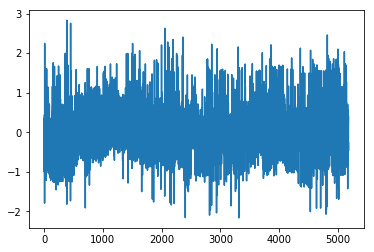

In [791]:
plt.plot(outliners)
plt.show()

In [792]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = TEST_SIZE, random_state = 0)

In [793]:
# Reduced Features
print(data.shape)
print(X.shape)

(740, 20)
(576, 18)


## Support Vector Machine - Linear

## Training

In [794]:
classifer_train = svm.SVC(kernel='linear')

In [795]:
classifer_train.fit(xTrain, yTrain) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [796]:
xTrain.shape

(403, 18)

In [797]:
yTrain.shape

(403,)

In [798]:
classifer_train.support_vectors_

array([[  0.,   0.,   6., ...,   1.,  77., 175.],
       [ 23.,   4.,   4., ...,   2.,  69., 169.],
       [ 28.,   3.,   2., ...,   2.,  69., 169.],
       ...,
       [ 13.,   6.,   2., ...,   1.,  73., 171.],
       [ 13.,   3.,   6., ...,   0.,  65., 168.],
       [ 13.,   8.,   2., ...,   4.,  80., 172.]])

In [799]:
classifer_train.support_

array([ 47,  10,  16,  34,  36,  43,  49,  51,  70,  73,  76, 103, 110,
       111, 115, 118, 121, 122, 123, 140, 143, 144, 155, 171, 180, 205,
       206, 207, 219, 231, 246, 252, 258, 259, 286, 308, 313, 315, 330,
       337, 338, 340, 346, 348, 377, 382, 384, 388, 390, 398,   2,   5,
         7,  13,  14,  21,  26,  30,  37,  45,  52,  54,  56,  61,  62,
        72,  81,  86,  87,  93,  96,  97,  98,  99, 101, 104, 106, 107,
       112, 114, 117, 124, 127, 130, 132, 135, 137, 150, 162, 163, 164,
       182, 189, 192, 195, 212, 215, 216, 225, 226, 227, 233, 235, 239,
       244, 248, 249, 254, 260, 268, 270, 272, 278, 279, 301, 310, 314,
       318, 320, 325, 327, 329, 331, 334, 341, 363, 369, 371, 375, 385,
       392, 393, 394,   0,   8,  11,  17,  20,  23,  25,  35,  39,  40,
        53,  58,  64,  77,  78,  82,  84,  90,  95, 105, 119, 125, 128,
       133, 139, 142, 145, 147, 152, 157, 158, 160, 166, 175, 176, 177,
       184, 193, 196, 200, 222, 223, 224, 234, 243, 269, 273, 27

In [800]:
classifer_train.n_support_

array([ 1, 49, 83, 73, 35,  5,  1, 96, 13,  7,  3,  3])

In [801]:
clf_predictions = classifer_train.predict(xTest)
print("Accuracy: {}%".format(classifer_train.score(xTest, yTest) * 100 ))

Accuracy: 46.24277456647399%


## Testing

In [802]:
classifer_test = svm.SVC(kernel='linear')

In [803]:
classifer_test.fit(xTest, yTest)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [804]:
classifer_test.support_vectors_

array([[  0.,   0.,   4., ...,   2., 100., 170.],
       [ 27.,   1.,   2., ...,   0.,  83., 172.],
       [ 13.,   5.,   5., ...,   0.,  56., 171.],
       ...,
       [ 19.,   6.,   5., ...,   0.,  98., 178.],
       [ 19.,   1.,   2., ...,   0.,  83., 172.],
       [ 14.,  11.,   2., ...,   1.,  73., 171.]])

In [805]:
classifer_test.support_

array([ 89, 147,  11,  12,  17,  47,  48,  50,  52,  54,  58,  64,  74,
        78,  88,  95,  96,  97, 105, 123, 128, 132, 133, 149, 150, 158,
       159, 166,   1,   2,   4,   7,   8,  18,  23,  25,  28,  29,  31,
        36,  37,  38,  45,  49,  56,  69,  71,  73,  75,  81,  85, 107,
       111, 116, 118, 143, 152, 157, 163, 165, 171,  10,  20,  26,  41,
        43,  68,  79,  82, 103, 106, 110, 112, 114, 120, 124, 126, 129,
       141, 142, 146, 162, 164, 168,   3,   6,  32,  33,  46,  66,  83,
        84,  87,  98, 122, 139, 148, 167, 170, 172, 140,   0,   5,   9,
        13,  16,  19,  21,  22,  27,  30,  34,  39,  42,  44,  51,  59,
        60,  61,  62,  63,  65,  70,  90,  91,  93,  94, 101, 102, 104,
       113, 115, 117, 119, 121, 127, 130, 131, 134, 137, 138, 151, 155,
       156, 161, 144,  14,  15,  53,  86, 125, 136,  77, 109])

In [806]:
classifer_test.n_support_

array([ 2, 26, 33, 23, 16,  1, 44,  1,  6,  1,  1])

In [807]:
clf_predictions = classifer_test.predict(xTest)
print("Accuracy: {}%".format(classifer_test.score(xTest, yTest) * 100 ))

Accuracy: 65.3179190751445%


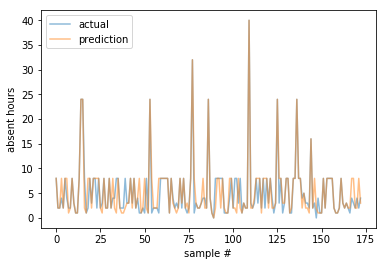

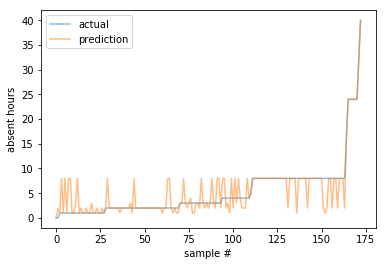

In [808]:
# Provided By Cormac Lavery
predictions = classifer_test.predict(xTest)
plt.xlabel("sample #")
plt.ylabel("absent hours")
plt.plot(yTest, alpha=.5, label="actual")
plt.plot(predictions, alpha=.5, label="prediction")
plt.legend(loc='upper left')
plt.show()

sorted_indexs = yTest.argsort()
plt.xlabel("sample #")
plt.ylabel("absent hours")
plt.plot(yTest[sorted_indexs], alpha=.5, label="actual")
plt.plot(predictions[sorted_indexs], alpha=.5, label="prediction")
plt.legend(loc='upper left')
plt.show()

## Grid Search CV

In [809]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [810]:
def rmsle(y_predicted, y_real):
    return np.sqrt(np.mean(np.power(np.log1p(y_predicted)-np.log1p(y_real), 2)))
def procenterror(y_predicted, y_real):
     return np.round( np.mean(np.abs(y_predicted-y_real) )/ np.mean(y_real) *100 ,1)

## Training

In [811]:
grid_search_train_regr =  GridSearchCV(svm.SVC(),param_grid, refit = True, verbose = 1)

In [812]:
grid_search_train_regr = grid_search_train.fit(xTrain,yTrain)

NameError: name 'grid_search_train' is not defined

In [813]:
print("Grid Search CV",'%error',procenterror(grid_search_train_regr.predict(xTrain),yTrain),'rmsle',rmsle(grid_search_train_regr.predict(xTrain),yTrain))

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [814]:
print("Grid Search",'Classification Report')
classif=classification_report(yTrain,np.round(grid_search_train_regr.predict(xTrain)))
print(classif)

# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(yTrain,np.round(grid_search_train_regr.predict(xTrain))) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Grid Search Classification Report


NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [815]:
grid_search_test =  GridSearchCV(svm.SVC(),param_grid, refit = True, verbose = 1)

In [816]:
grid_search_test_regr = grid_search_test.fit(xTest,yTest)

C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [817]:
print("Grid Search CV",'%error',procenterror(grid_search_test_regr.predict(xTest),yTest),'rmsle',rmsle(grid_search_test_regr.predict(xTest),yTest))

Grid Search CV %error 7.7 rmsle 0.2551544572578902


In [818]:
print("Grid Search",'Classification Report')
classif=classification_report(yTest,np.round(grid_search_test_regr.predict(xTest)))
print(classif)

# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(yTest,np.round(grid_search_test_regr.predict(xTest))) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Grid Search Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         2
         1.0       1.00      0.96      0.98        26
         2.0       0.85      0.93      0.89        42
         3.0       0.89      0.71      0.79        24
         4.0       1.00      0.62      0.77        16
         5.0       1.00      1.00      1.00         1
         8.0       0.84      1.00      0.91        53
        16.0       0.00      0.00      0.00         1
        24.0       1.00      1.00      1.00         6
        32.0       1.00      1.00      1.00         1
        40.0       1.00      1.00      1.00         1

   micro avg       0.89      0.89      0.89       173
   macro avg       0.87      0.79      0.82       173
weighted avg       0.89      0.89      0.88       173

--------------------------------------------------------------------------------
Accuracy 89.02 %


C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\fergu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Linear Regression

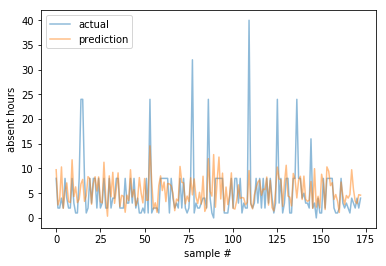

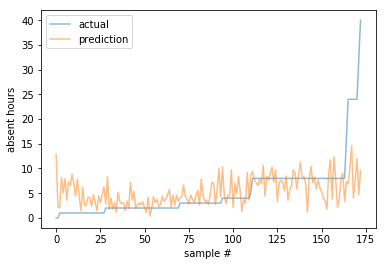

regression model stats
26.918460238997962
0.17777979983122716
classification model stats based on linear accuracy
5.9479768786127165
0.8183199671782478


In [819]:
# Provided By Cormac Lavery
regression = LinearRegression()
regression.fit(xTrain, yTrain)
predictions_regression = regression.predict(xTest)

plt.xlabel("sample #")
plt.ylabel("absent hours")
plt.plot(yTest, alpha=.5, label="actual")
plt.plot(predictions_regression, alpha=.5, label="prediction")
plt.legend(loc='upper left')
plt.show()

sorted_indexs = yTest.argsort()
plt.xlabel("sample #")
plt.ylabel("absent hours")
plt.plot(yTest[sorted_indexs], alpha=.5, label="actual")
plt.plot(predictions_regression[sorted_indexs], alpha=.5, label="prediction")
plt.legend(loc='upper left')
plt.show()

print("regression model stats")
print(mean_squared_error(yTest, predictions_regression))
print(r2_score(yTest, predictions_regression))

print("classification model stats based on linear accuracy")
print(mean_squared_error(yTest, predictions))
print(r2_score(yTest, predictions))

#### References
* [1] [SVM Scikit learn] (https://www.learnopencv.com/svm-using-scikit-learn-in-python/)
* [2] [ten-100-correct-models]
(https://www.kaggle.com/plarmuseau/ten-100-correct-models)
* [3] [box-plot-in-python]
(http://www.datasciencemadesimple.com/box-plot-in-python/)
* [4] [Comparing machine learning models in scikit-learn]
(https://www.youtube.com/watch?v=0pP4EwWJgIU)
* [5] [learn-how-to-build-flexible-machine-learning-pipelines-in-sklearn]
(https://fizzylogic.nl/2017/11/07/learn-how-to-build-flexible-machine-learning-pipelines-in-sklearn/)
* [6] [Kevin Goetsch | Deploying Machine Learning using sklearn pipelines]
(https://www.youtube.com/watch?v=URdnFlZnlaE)
* [7]  [A basic soft-margin kernel SVM implementation in Python]
(http://tullo.ch/articles/svm-py/)
* [8] [Remove outliners in pandas dataframe] (https://stackoverflow.com/questions/37718584/removing-outliers-automatically-in-pandas-data-frame)
* [9] [Selected Dataset] (https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work)
* [10] [Factor Analysis] (http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html)
* [11] [Support Vector Machine] (http://scikit-learn.org/stable/modules/svm.html)
* [12] [GridSearchCV] (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

